In [1]:
import pandas as pd

/home/Nithish1201/DataScience/DataScienceEnv/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
data = pd.read_csv('../tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data.shape

(418, 12)

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
data.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [7]:
target = data.Survived
target

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [8]:
data.drop(['Survived'],axis=1,inplace=True)
data

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [9]:
data.isna().any()

Pclass    False
Sex       False
Age        True
Fare       True
dtype: bool

In [10]:
data.Age.fillna(data.Age.mean(),inplace=True)

In [11]:
data.isna().any()

Pclass    False
Sex       False
Age       False
Fare       True
dtype: bool

In [12]:
data.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [13]:
data.fillna(data.Pclass.mean(),inplace=True)

In [14]:
data.isna().any()

Pclass    False
Sex       False
Age       False
Fare      False
dtype: bool

In [15]:
data.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [16]:
data['Age'] = data.Age.astype(int)

In [17]:
data.head()

,Pclass,Sex,Age,Fare
0,3,male,34,7.8292
1,3,female,47,7.0000
2,2,male,62,9.6875
3,3,male,27,8.6625
4,3,female,22,12.2875


In [18]:
dummy = pd.get_dummies(data.Sex)
dummy.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [19]:
data = pd.concat([data,dummy],axis=1)
data

,Pclass,Sex,Age,Fare,female,male
0,3,male,34,7.8292,0,1
1,3,female,47,7.0000,1,0
2,2,male,62,9.6875,0,1
3,3,male,27,8.6625,0,1
4,3,female,22,12.2875,1,0
...,...,...,...,...,...,...
413,3,male,30,8.0500,0,1
414,1,female,39,108.9000,1,0
415,3,male,38,7.2500,0,1
416,3,male,30,8.0500,0,1


In [20]:
data.drop(['Sex'],axis=1,inplace=True)
data.head()

,Pclass,Age,Fare,female,male
0,3,34,7.8292,0,1
1,3,47,7.0000,1,0
2,2,62,9.6875,0,1
3,3,27,8.6625,0,1
4,3,22,12.2875,1,0


In [21]:
target

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data,target,test_size=0.2)

In [25]:
Xtest.shape

(84, 5)

In [26]:
Xtrain.shape

(334, 5)

In [27]:
ytest.shape

(84,)

In [28]:
ytrain.shape

(334,)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)

GaussianNB()

In [30]:
model.score(Xtest,ytest)

1.0

In [31]:
ypred = model.predict(Xtest)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

1.0

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ytest,ypred)
matrix

array([[59,  0],
       [ 0, 25]])

<AxesSubplot:>

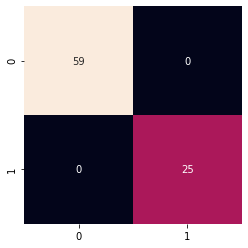

In [34]:
import seaborn as sns
sns.heatmap(matrix,square=True,annot=True,cbar=False)